In [28]:
#Import all needed modules

import pandas as pd #pandas for handling the dataset
import numpy as np #numpy for numerical operations
import matplotlib.pyplot as plt #matplotlib.pyplot for creating visualizations
import scipy.stats as stats #scipy.stats for the Shapiro-Wilk test 
import seaborn as sns
from sklearn.linear_model import LinearRegression #sklearn.linear_model.LinearRegression to perform Simple Linear Regression
from sklearn.metrics import r2_score  #sklearn.metrics.r2_score to evaluate the regression model

In [29]:
# Load the dataset
df = pd.read_csv("data_full.csv")

print(df.head())  # View first few rows
print(df.info())  # Check data types and missing values
print(df.describe())  # Get summary statistics
print(df.columns)  # Print column names exactly as they appear

   num     msttr  ari   fg     fe  words  comm
0  102  0.705500  6.2  3.7  86.50   1494    10
1  107  0.701875  6.2  4.8  83.76   3469     8
2  106  0.710899  9.2  7.3  77.16   7559    21
3  107  0.710899  9.2  7.3  77.16   7559    21
4  124  0.701765  9.8  6.7  78.89   1465     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     100 non-null    int64  
 1   msttr   100 non-null    float64
 2   ari     100 non-null    float64
 3   fg      100 non-null    float64
 4   fe      100 non-null    float64
 5   words   100 non-null    int64  
 6   comm    100 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 5.6 KB
None
             num       msttr        ari          fg          fe        words  \
count  100.00000  100.000000  100.00000  100.000000  100.000000   100.000000   
mean   113.70000    0.714698    8.03200    6.134000   80.668400  46

In [30]:
# Define independent variables (literary quality measures) and dependent variable (success in kudos)
independent_vars = ["msttr", "ari", "fg", "fe", "words", "comm"]
dependent_var = "num"  # Keep the actual column name

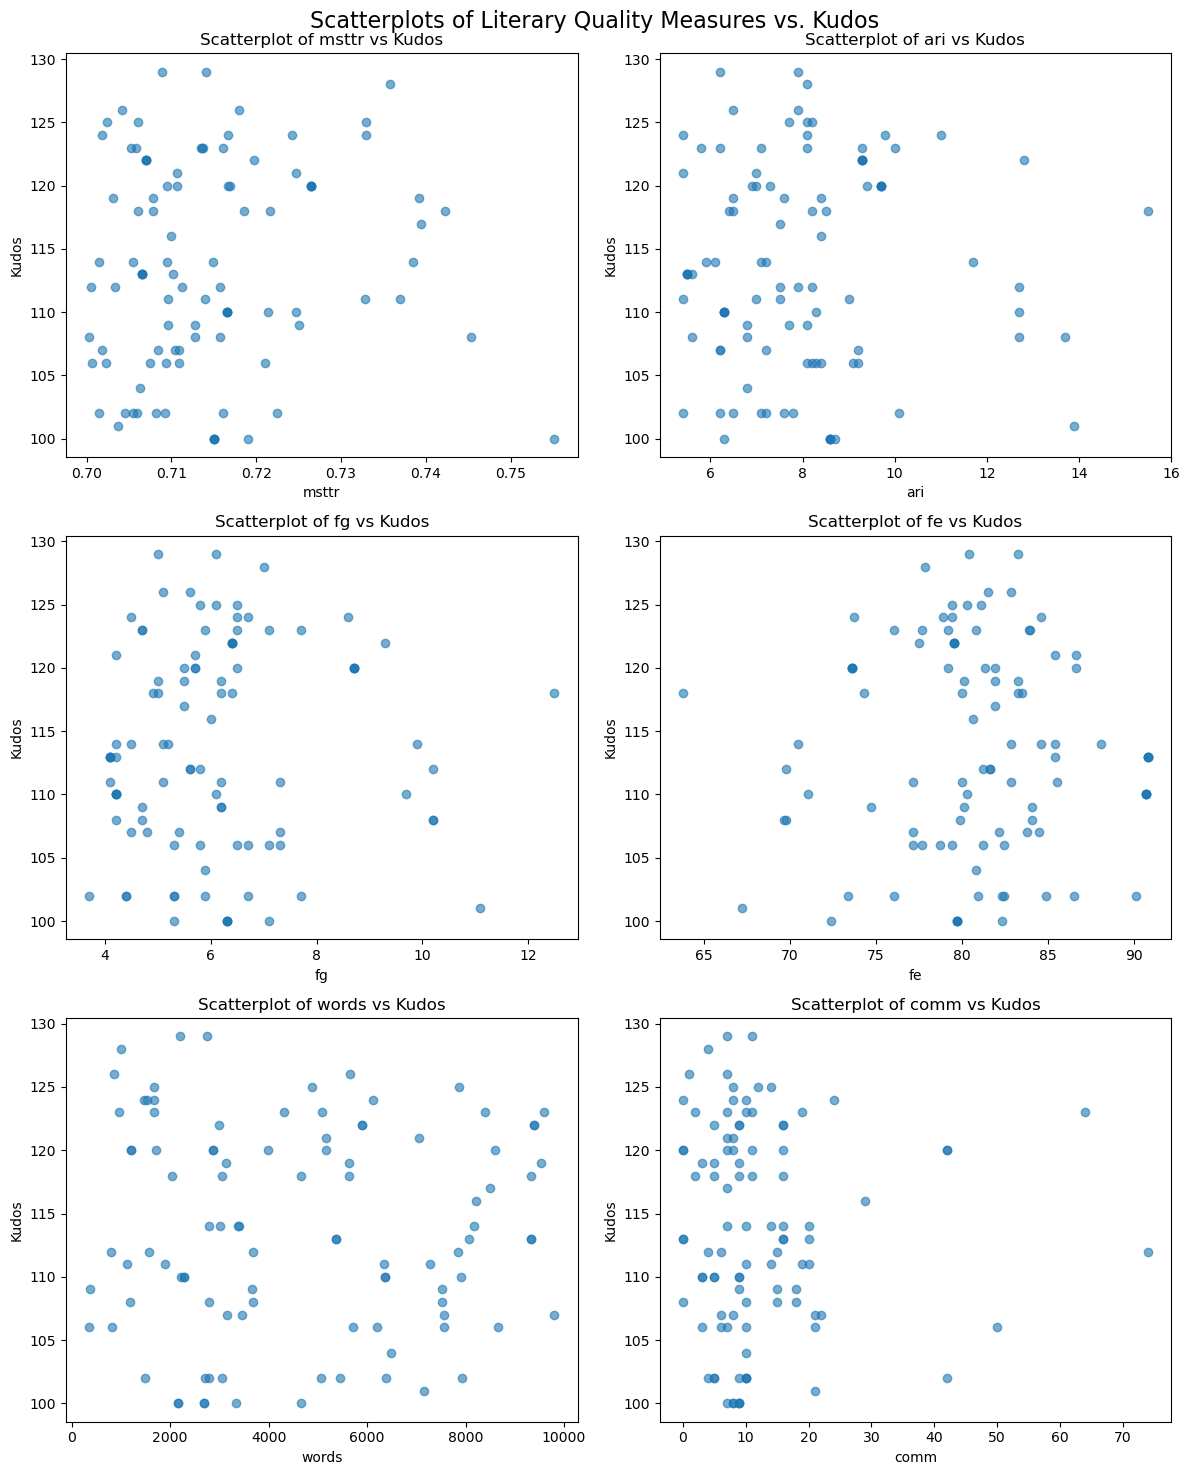

In [31]:
# Step 1: Scatterplots to visualize relationships
#We create scatterplots to visually examine the relationship between each literary measure and kudos. If a variable has a clear trend (upward or downward slope), it might be a good predictor.

fig, axes = plt.subplots(3, 2, figsize=(12, 15)) 
fig.suptitle("Scatterplots of Literary Quality Measures vs. Kudos", fontsize=16)

axes = axes.flatten() 

for i, var in enumerate(independent_vars):
    if i < len(axes):  
        axes[i].scatter(df[var], df[dependent_var], alpha=0.6)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Kudos")  # Change label to "Kudos"
        axes[i].set_title(f"Scatterplot of {var} vs Kudos")  # Change title to "Kudos"

plt.tight_layout()
plt.show()


Regression results for msttr:
  Intercept: 71.2720
  Slope: 59.3649
  R² Score: 0.0065


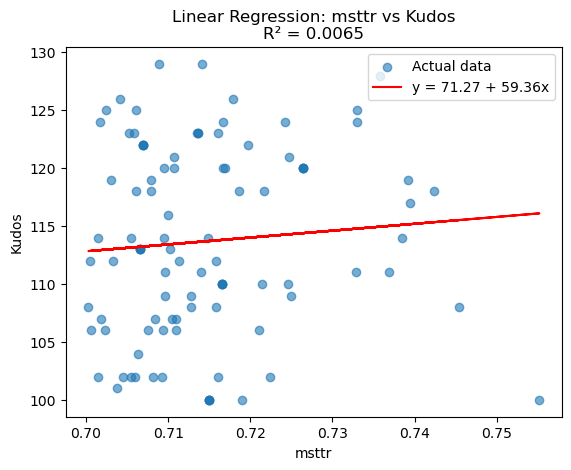


Regression results for ari:
  Intercept: 113.0160
  Slope: 0.0852
  R² Score: 0.0005


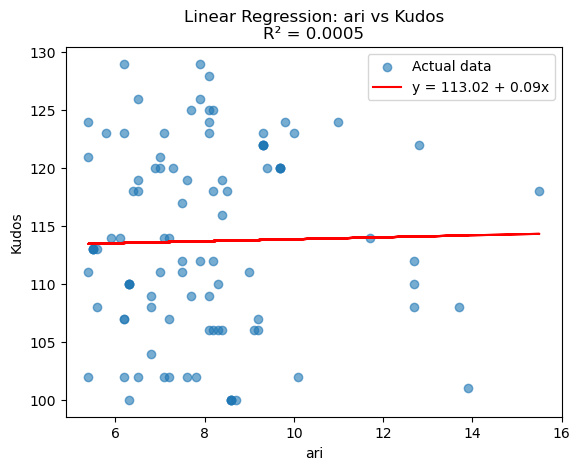


Regression results for fg:
  Intercept: 112.1934
  Slope: 0.2456
  R² Score: 0.0027


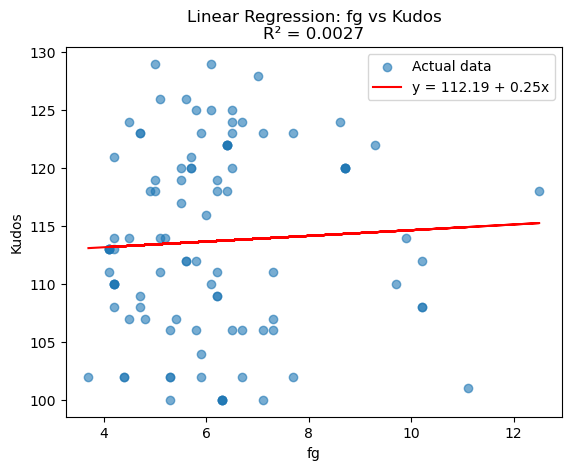


Regression results for fe:
  Intercept: 115.1165
  Slope: -0.0176
  R² Score: 0.0001


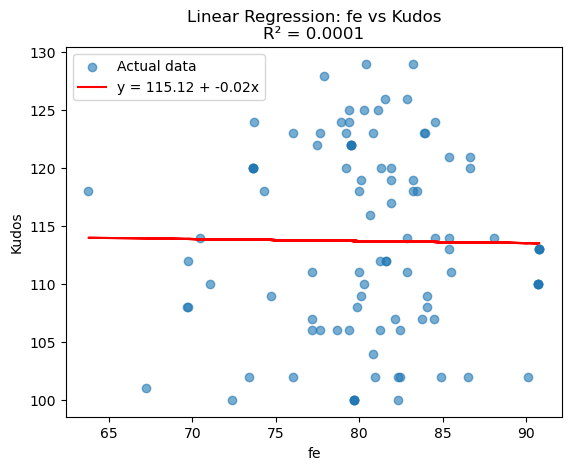


Regression results for words:
  Intercept: 113.7431
  Slope: -0.0000
  R² Score: 0.0000


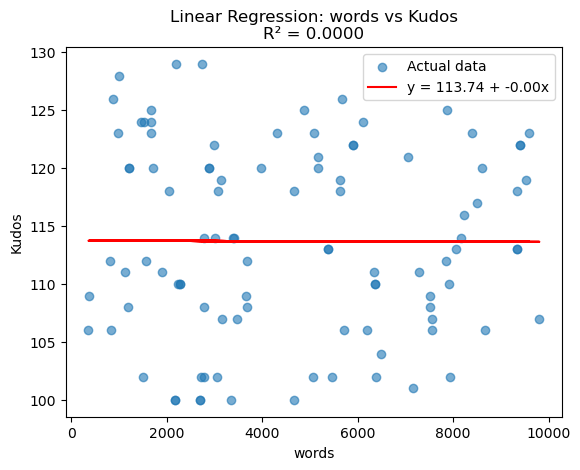


Regression results for comm:
  Intercept: 113.8604
  Slope: -0.0129
  R² Score: 0.0004


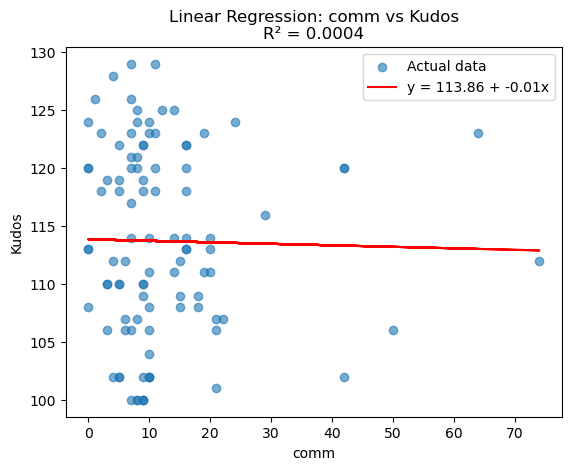

In [34]:
# Step 2: Perform linear regression and analyze results
results = {}

for var in independent_vars:
    X = df[[var]]  # Independent variable
    y = df[dependent_var]  # Dependent variable

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Get predictions
    y_pred = model.predict(X)

    # Get coefficients
    intercept = model.intercept_
    slope = model.coef_[0]

    # Compute R2 score
    r2 = r2_score(y, y_pred)

    # Store results
    results[var] = {
        "intercept": intercept,
        "slope": slope,
        "r2_score": r2,
        "residuals": y - y_pred,
        "fitted": y_pred  # Store fitted values (predictions)
    }


     # Print intercept, slope, and R² score
    print(f"\nRegression results for {var}:")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  Slope: {slope:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    # Plot the regression line
    plt.scatter(X, y, alpha=0.6, label="Actual data")
    plt.plot(X, y_pred, color='red', label=f"y = {intercept:.2f} + {slope:.2f}x")
    plt.xlabel(var)
    plt.ylabel("Kudos")
    plt.title(f"Linear Regression: {var} vs {"Kudos"}\nR² = {r2:.4f}")
    plt.legend()
    plt.show()

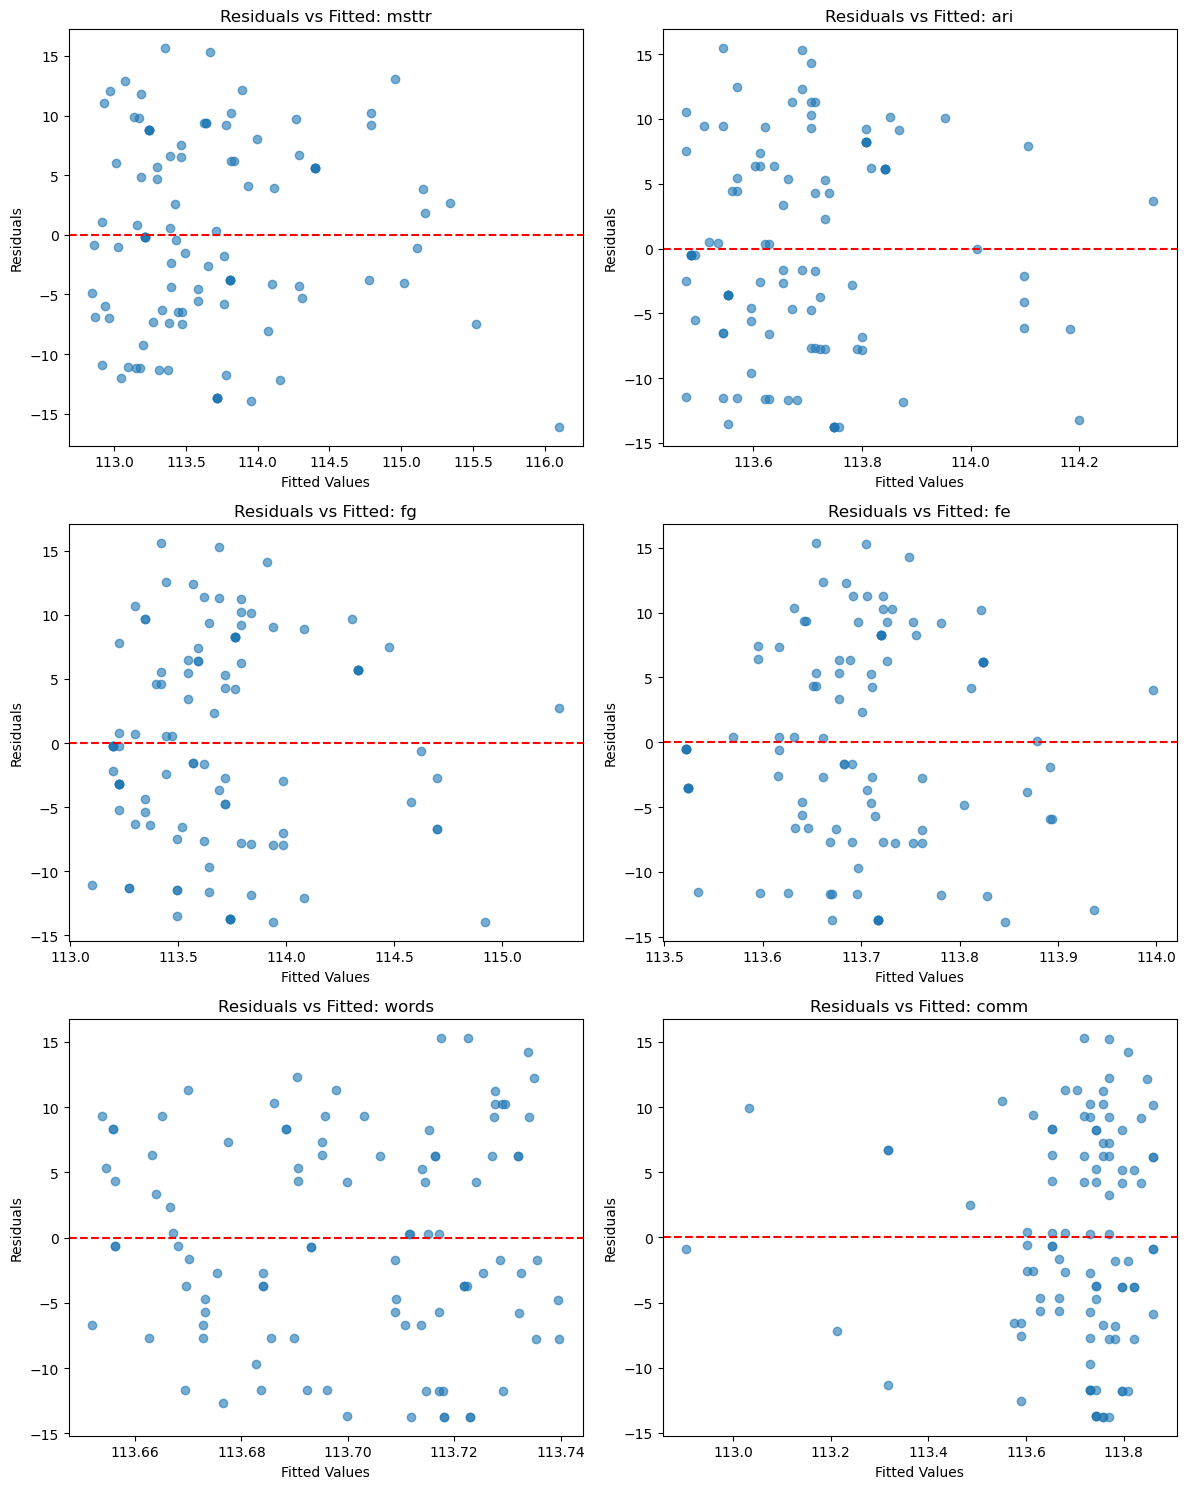

Shapiro-Wilk test p-values:
msttr: 0.0081
ari: 0.0022
fg: 0.0035
fe: 0.0019
words: 0.0015
comm: 0.0017


In [33]:
# Step 3: Plot residuals and perform Shapiro-Wilk test
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  
axes = axes.flatten()

shapiro_results = {}

for i, var in enumerate(independent_vars):
    residuals = results[var]["residuals"]  # Ensure residuals exist for each variable
    fitted_values = results[var]["fitted"]

    #Plot residuals vs fitted results
    axes[i].scatter(fitted_values, residuals, alpha=0.6)
    axes[i].axhline(y=0, color='r', linestyle='--')  
    axes[i].set_title(f"Residuals vs Fitted: {var}")
    axes[i].set_xlabel("Fitted Values")
    axes[i].set_ylabel("Residuals")

plt.tight_layout()
plt.show()    
    

   # Perform Shapiro-Wilk test on residuals
for var in independent_vars:
    residuals = results[var]["residuals"]
    shapiro_test = stats.shapiro(residuals)
    shapiro_results[var] = shapiro_test.pvalue

# Print Shapiro-Wilk test p-values
print("Shapiro-Wilk test p-values:")
for var, p_value in shapiro_results.items():
    print(f"{var}: {p_value:.4f}")